<a href="https://colab.research.google.com/github/Mrym17/MachineLearning-with-python/blob/main/Multivariate_Linear_Regression_with_insurance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

### **Dataset**

In [ ]:
data = pd.read_csv('/content/insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.shape

(1338, 7)

# **Data Visualization**

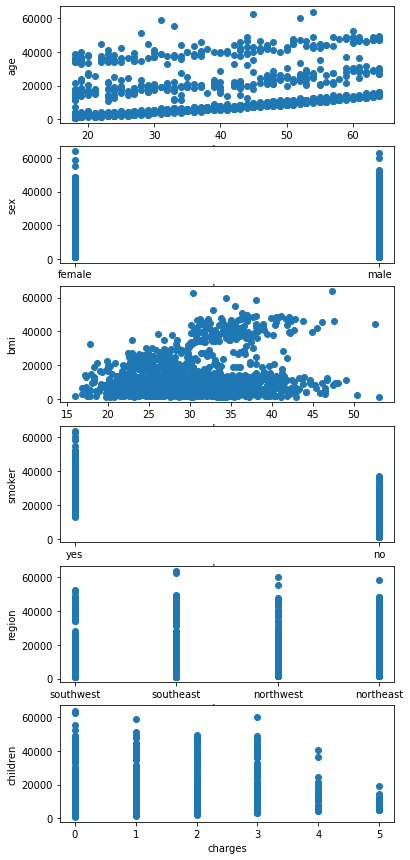

In [ ]:
# Pair-wise Scatter Plots

fig, ax = plt.subplots(6, figsize=(6, 15))
ax[0].scatter(x = data['age'], y = data['charges'])
ax[0].set_xlabel("charges")
ax[0].set_ylabel("age")

ax[1].scatter(x = data['sex'], y = data['charges'])
ax[1].set_xlabel("charges")
ax[1].set_ylabel("sex")
ax[2].scatter(x = data['bmi'], y = data['charges'])
ax[2].set_xlabel("charges")
ax[2].set_ylabel("bmi")
ax[3].scatter(x = data['smoker'], y = data['charges'])
ax[3].set_xlabel("charges")
ax[3].set_ylabel("smoker")
ax[4].scatter(x = data['region'], y = data['charges'])
ax[4].set_xlabel("charges")
ax[4].set_ylabel("region")
ax[5].scatter(x = data['children'], y = data['charges'])
ax[5].set_xlabel("charges")
ax[5].set_ylabel("children")


plt.show()

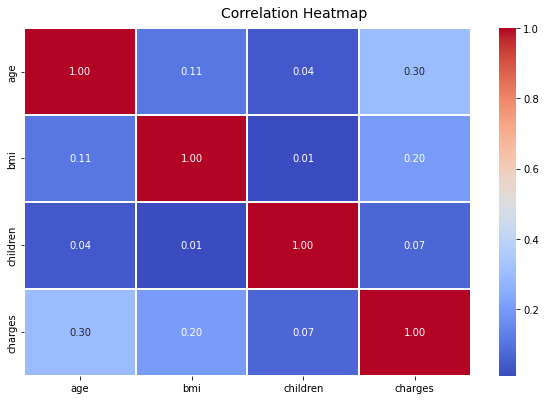

In [ ]:
#correlation 
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

## **Data Preprocessing**

In [ ]:
#checking for redundant data
data.duplicated().sum()

1

In [ ]:
#dropped redundant rows
data.drop_duplicates(subset='age', keep='first', inplace= True)

In [ ]:
#rechecking
data.duplicated().sum()

0

In [ ]:
#converting Catagorical data to Numeric
d1 =pd.get_dummies(data, drop_first=True)
d1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0
10,25,26.220,0,2721.32080,1,0,0,0,0


In [ ]:
d1.shape

(47, 9)

In [ ]:
#Relocation the Y column to the end for separating X and Y
first_column = d1.pop('charges')
d1.insert(8, 'charges', first_column)

In [ ]:
d1

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
5,31,25.740,0,0,0,0,1,0,3756.62160
6,46,33.440,1,0,0,0,1,0,8240.58960
7,37,27.740,3,0,0,1,0,0,7281.50560
9,60,25.840,0,0,0,1,0,0,28923.13692
10,25,26.220,0,1,0,0,0,0,2721.32080


# **Feature Scaling - Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(d1)

In [ ]:
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[ 8.26761827e-18  1.65352365e-16 -4.72435330e-18  3.30704731e-17
 -7.08652994e-17  7.08652994e-17 -1.88974132e-17  4.72435330e-18
  9.21248893e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
print('Min values (age,	bmi,	children,	charges,	sex_male,	smoker_yes,	region_northwest,	region_southeast,	region_southwest): ', data_scaled.min(axis=0))
print('Max values (age	bmi	children	charges	sex_male	smoker_yes	region_northwest	region_southeast	region_southwest): ', data_scaled.max(axis=0))

Min values (age,	bmi,	children,	charges,	sex_male,	smoker_yes,	region_northwest,	region_southeast,	region_southwest):  [-1.6955825  -1.7939937  -0.90019155 -0.86066297 -0.61834694 -0.58554004
 -0.6846532  -0.51987524 -1.11441615]
Max values (age	bmi	children	charges	sex_male	smoker_yes	region_northwest	region_southeast	region_southwest):  [1.6955825  2.18330925 1.8003831  1.161895   1.61721508 1.70782513
 1.46059349 1.92353841 2.58752932]


## **Data Split**

In [ ]:
ratio = 0.7 
total_rows = d1.shape[0]
train_size = int(total_rows*ratio)
 
# Spliting data into test and train
train = d1[0:train_size]
test = d1[train_size:]

In [ ]:
train.shape, test.shape

((32, 9), (15, 9))

In [ ]:
train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
5,31,25.740,0,0,0,0,1,0,3756.62160
6,46,33.440,1,0,0,0,1,0,8240.58960
7,37,27.740,3,0,0,1,0,0,7281.50560
9,60,25.840,0,0,0,1,0,0,28923.13692
10,25,26.220,0,1,0,0,0,0,2721.32080


In [ ]:
#separating X & Y for training data
train = train.values
Y = train[:, -1].reshape(train.shape[0], 1)
X = train[:, :-1]

In [ ]:
#separating X and Y for testing Data
test = test.values
Y_test = test[:, -1].reshape(test.shape[0], 1)
X_test = test[:, :-1]

In [ ]:
print("Shape of X_train :", X.shape)
print("Shape of Y_train :", Y.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (32, 8)
Shape of Y_train : (32, 1)
Shape of X_test : (15, 8)
Shape of Y_test : (15, 1)


# **Adding Bias**

In [ ]:
#adding bias for both training and test data
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T


In [ ]:
X.shape

(32, 9)

# **Functions**

In [ ]:
def model(theta, X, Y, learning_rate, iteration):
  m = Y.size
  theta = np.zeros((X.shape[1], 1))
  cost_list = []
  for i in range(iteration):
    y_pred = np.dot(X, theta)
    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))

    d_theta = (1/m)*np.dot(X.T, y_pred - Y)
    theta = theta - learning_rate*d_theta
    cost_list.append(cost)
# to print the cost for 10 times 
    if(i%(iteration/10) == 0):
       print('iteration : ', i, "  Cost is :", cost)
  return theta, cost_list

# **Training**

In [ ]:
iteration = 1000000
learning_rate = 0.0001
theta, cost_list = model(theta, X, Y, learning_rate = learning_rate, iteration =
iteration)

iteration :  0   Cost is : 243303164.65885395
iteration :  100000   Cost is : 17585563.09816851
iteration :  200000   Cost is : 14559508.612862118
iteration :  300000   Cost is : 14166414.38374238
iteration :  400000   Cost is : 14047657.17135059
iteration :  500000   Cost is : 13981910.607579224
iteration :  600000   Cost is : 13937750.166370662
iteration :  700000   Cost is : 13906677.34483717
iteration :  800000   Cost is : 13884526.60293128
iteration :  900000   Cost is : 13868664.673531074


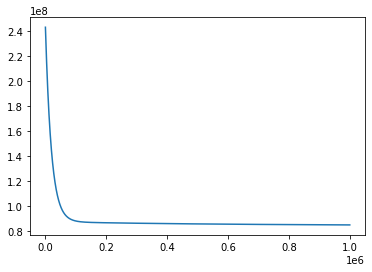

In [ ]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()

error = (1/m) * ∑|y_pred−Y|

In [ ]:
y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))

In [ ]:
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : 905261.8497110219 %
Test Accuracy is : -905161.8497110219 %


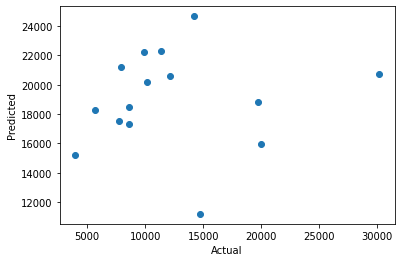

In [ ]:
plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

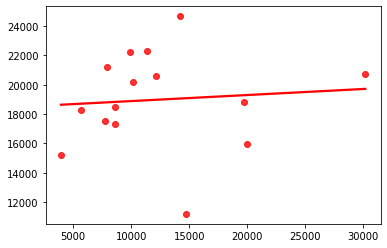

In [ ]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red');